## Qualitative Evaluation of Results

Plots for qualitative evaluation in the paper.

In [1]:
run ="seed_1-tasksource"

In [2]:
import json
res_objectives = json.load(open(f"eval_run-ragtruth-QA/{run}/eval_objectives.json"))

In [3]:
import numpy as np
objective_values = np.array(list(res_objectives.values()))

In [4]:
objective_values.shape

(2, 1256)

In [5]:
import matplotlib.pyplot as plt

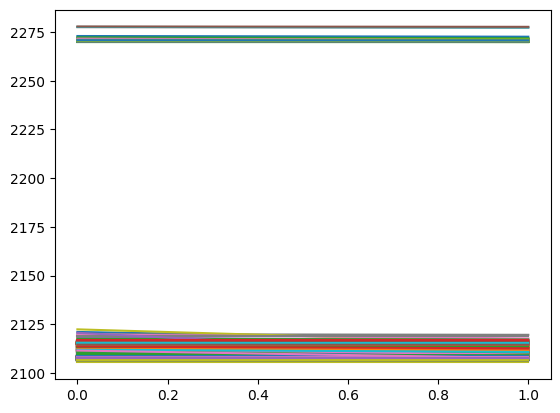

In [7]:
f = plt.plot(objective_values)

In [ ]:
import pandas as pd
from src.utils.script_utils import init_population_from_dump
from src.sync_data.population import Population
it_use =1
for i in range(1,6):
    sync_data = pd.read_csv(f"eval_run-ragtruth-QA/seed_{i}-tasksource/data_iteration_1.csv")
    myres[i] = init_population_from_dump(sync_data)
    print(len(myres[i]))

In [20]:
armins = np.argmin(objective_values, axis=0)

(array([702.,   0.,   0., 231.,   0.,   0., 148.,   0.,   0., 175.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

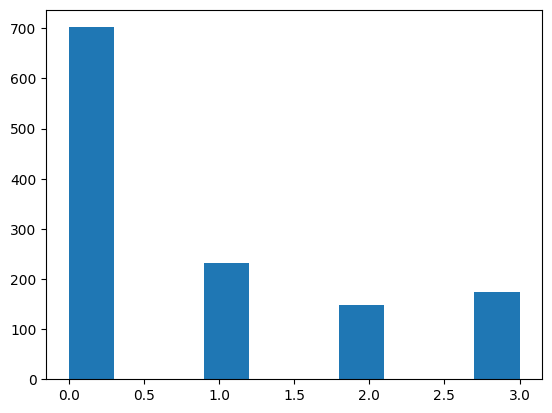

In [21]:
plt.hist(armins)

In [57]:
import pandas as pd
from src.utils.script_utils import init_population_from_dump
from src.sync_data.population import Population
run ="seed_1-tasksource"
sync_data1 = pd.read_csv(f"eval_run-ragtruth-QA/{run}/data_iteration_1.csv")
sync_data2 = pd.read_csv(f"eval_run-ragtruth-QA/{run}/data_iteration_2.csv")
mutations_used = sync_data1["ref"]//100000

In [58]:
import json
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams['text.usetex']= True
rcParams['pgf.texsystem'] ="pdflatex"
rcParams["text.latex.preamble"] = r"\usepackage{times}"
rcParams["font.family"] = 'times'

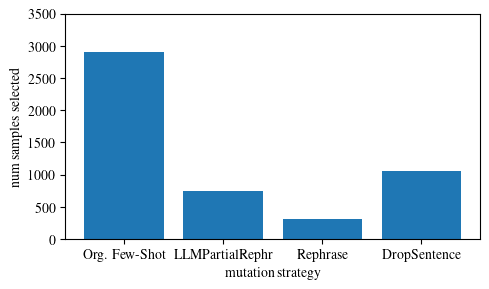

In [62]:
plt.hist(mutations_used, bins=[0,1,2,3,4], rwidth=0.8)
plt.gca().set_xticks([0.5,1.5,2.5,3.5], ["Org. Few-Shot", "LLMPartialRephr", "Rephrase", "DropSentence"])
plt.ylim([0,3500])
plt.xlabel("mutation strategy")
plt.ylabel("num samples selected")
plt.gcf().set_size_inches(5,3)
plt.tight_layout()
plt.gcf().savefig("figures/sample_selected.pdf")

In [56]:
import pandas as pd
from src.utils.script_utils import init_population_from_dump
from src.sync_data.population import Population
run ="seed_1-ensemble-mean"
certs = []
for i in range(3):
    sync_data1 = pd.read_csv(f"eval_run-ragtruth-QA/{run}/data_iteration_{i}.csv")
    certs.append(sync_data1["p_init"]*sync_data1["p_agree"]+(1-sync_data1["p_init"])*(1-sync_data1["p_agree"]))

Text(0, 0.5, '$\\hat{p}(y=1)$')

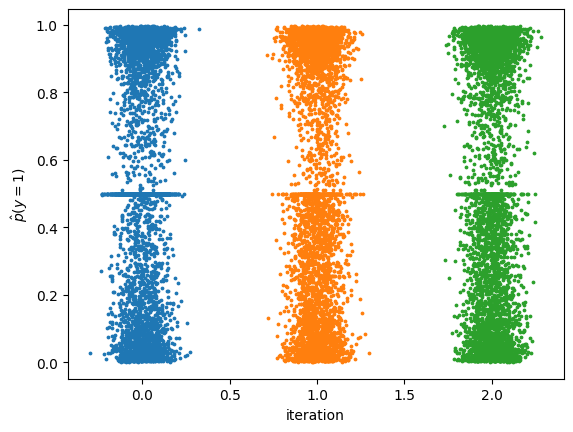

In [44]:
for i in range(3):
    plt.scatter(np.ones(len(certs[i]))*i+np.random.randn(len(certs[i]))*0.08, certs[i], 3)
plt.xlabel("iteration")
plt.ylabel(r"$\hat{p}(y=1)$")